<img src="https://minas.medellin.unal.edu.co/eventos/latwaves2018/images/logo_unal.png" alt="unal logo" width="500"/>

#Universidad Nacional de Colombia
###$\color{gray}{\textit{Procesamiento y Entendimiento del Lenguaje Natural Aplicado al Analisis del Indice S&P 500 Dentro de la Red Social Twitter }}$
#Proyecto Final Aplicado:#

  

  Presentado por:
####$\textit{Jesus David Clavijo Cardenas}$ [jesusdavidd3@gmail.com]()
####$\textit{Jorge Steban Moreno Lozano}$ [jorgestebanmorenolozano@gmail.com]()
####$\textit{Julian Mauricio Rodriguez Barreto}$ [jumrodriguezba@unal.edu.co]()

---

[Video Youtube](https://youtu.be/XAPMkF2xIrY)



---

# **Librerias necesarias**
---


In [ ]:
!pip install requests
!pip install beautifulsoup4
!wget https://raw.githubusercontent.com/mindlab-unal/mlds4-datasets/main/u1/install_chromedriver.sh -O install_chromedriver.sh
!chmod +x install_chromedriver.sh && ./install_chromedriver.sh
!apt update
!apt install chromium-browser
!apt install chromium chromium-driver
!pip install selenium
!pip install unidecode
!pip install contextualSpellCheck
import requests
import pandas as pd
import bs4
import time
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython.display import Image
import numpy as np
import warnings
plt.style.use("ggplot")
warnings.filterwarnings('ignore')
from gensim.models import FastText
import seaborn as sns
from datetime import datetime, timedelta
from gensim.utils import simple_preprocess
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import re
from typing import Counter
import spacy
from unidecode import unidecode
from IPython.display import display
import contextualSpellCheck
from wordcloud import WordCloud
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from gensim.models import Word2Vec

# **Entendimiento del Negocio y Carga de Textos**
---


## **1. Marco de Proyecto**
---

En un entorno empresarial cada vez más digitalizado y conectado, el impacto de las redes sociales en las decisiones empresariales y financieras es innegable. Específicamente, la plataforma de Twitter ha emergido como un canal crucial para la comunicación corporativa y la interacción con los stakeholders. Los tweets de empresas y líderes empresariales, especialmente cuando son publicados por figuras prominentes como Elon Musk, pueden tener un impacto significativo en el mercado financiero, la percepción de la marca y las reacciones de los consumidores.

### **1.1. Trasfondo del Negocio**
---



* **Quién es el cliente o los beneficiarios del proyecto?**



Empresas y líderes empresariales: Aquellas empresas y líderes empresariales que deseen comprender mejor el impacto de sus tweets en el mercado financiero, la percepción de la marca y las reacciones de los consumidores serían los principales beneficiarios. Esta herramienta de Procesamiento del Lenguaje Natural (NLP) les proporcionaría información valiosa sobre cómo sus mensajes son recibidos y percibidos por el público, permitiéndoles ajustar su estrategia de comunicación en consecuencia.

Inversionistas y analistas financieros: Los inversionistas y analistas financieros podrían utilizar esta herramienta para analizar y evaluar el impacto de los tweets empresariales en el valor de mercado de las empresas en las que invierten. Les ayudaría a tomar decisiones más informadas sobre sus carteras de inversión y a anticipar posibles movimientos del mercado basados en la actividad en Twitter.

* **¿En qué dominio se encuentran?**

El dominio de este proyecto se puede dividir en dos categorias principales:

Marketing y Relaciones Públicas: La herramienta ayuda a las empresas a entender cómo sus tweets y los de la competencia afectan la percepción de la marca, la satisfacción del cliente y la eficacia de las estrategias de comunicación en redes sociales.

Finanzas y Mercados: Permite a inversores y analistas evaluar el impacto de los tweets empresariales en el valor de mercado de las empresas, identificar tendencias y anticipar movimientos en los mercados financieros.

* **¿Qué problemas del negocio o del dominio estamos tratando de solucionar?**

Los tweets de las empresas, especialmente cuando son publicados por figuras prominentes como Elon Musk, pueden tener un gran impacto en las decisiones empresariales y en los mercados financieros. Estos mensajes tienen el potencial de influir en el valor de mercado de la empresa, afectar la percepción de la marca y provocar reacciones inmediatas por parte de los consumidores. Además, Twitter proporciona a las empresas una plataforma para comunicarse directamente con su audiencia, lo que les permite ser más transparentes y receptivas a las opiniones y preocupaciones de los clientes e inversores.

### **1.2. Alcance**
---



### **1.2. Alcance**
---



- **¿Qué  solución de procesamiento de lenguaje natural tratamos de implementar?**

La solución de procesamiento de lenguaje natural que buscamos implementar se centra en el reconocimiento de sentimientos a partir de tweets analizados sobre el mercado de valores, específicamente el índice S&P 500. Este enfoque se debe a que dicho índice abarca una gran parte de la economía de Estados Unidos, proporcionando así un panorama general del estado económico en un momento dado.

- **¿Qué  se hará?**

Inicialmente, obtendremos los datos de la plataforma Kaggle, los cuales consisten en comentarios publicados en la plataforma X que hacen referencia al estado del mercado y los sentimientos asociados. Luego, realizaremos una exploración preliminar de los datos para comprender su naturaleza. Posteriormente, nos enfocaremos en seleccionar únicamente los datos relacionados con el índice S&P 500 para llevar a cabo el procesamiento correspondiente, esto incluirá la normalización del texto, la eliminación de caracteres especiales y la depuración de palabras redundantes o que no contribuyan al contexto del proyecto, y finalmente realizaremos el proceso de analisis de sentimientos a los datos depurados y contrastar la informacion que obtenemos del modelo con los datos reales del mercado.

- **¿De qué forma el cliente o beneficiario utilizará el producto del proyecto?**

El cliente o beneficiario podrá utilizar el proyecto para obtener una opinión más generalizada y sólida sobre el estado de la economía en ese momento, lo que le permitirá tomar decisiones informadas sobre posibles inversiones. Además, el análisis de sentimientos proporcionado por el proyecto ofrecerá una visión más profunda de la percepción del mercado, lo que puede ser valioso para evaluar riesgos y oportunidades.

### **1.3. Plan**
---

Puede agregar una lista de actividades con tiempos estimados, un diagrama de Gantt o integrar alguna herramienta de gestión de proyectos para mostrar la planeación del proyecto.

Semana del 22 de febrero al 27 de febrero:

* Recopilación de datos de la plataforma Kaggle - 1 dia
* Exploración inicial de los datos - 2 dias
* Preparación del entorno de desarrollo y configuración de herramientas - 1 dia
* Investigación sobre técnicas de procesamiento de lenguaje natural específicas para análisis de sentimientos - 1 dia

Semana del 28 de febrero al 5 de marzo:

* Selección y extracción de los datos relacionados con el índice S&P 500 - 2 dias
* Procesamiento de datos: normalización del texto, eliminación de caracteres especiales y depuración de palabras redundantes - 2 dias
* Entrenamiento inicial del modelo de análisis de sentimientos - 3 dias

Semana del 6 de marzo al 12 de marzo:

* Evaluación y ajuste de hiperparametros del modelo de análisis de sentimientos - 6 dias

Semana del 13 de marzo al 17 de marzo:

* Analisis de los resultados obtenidos y contraste con informacion real del mercado - 4 dias

## **2. Definición del Corpus**
---


### **2.1. Origen**
---



*   **¿De dónde vienen los textos?**

Los textos se obtienen en la plataforma Kaggle, donde se encuentra un dataset de Tweets financieros ([Tweets financieros](https://www.kaggle.com/datasets/davidwallach/financial-tweets?resource=download&select=stockerbot-export.csv)). En este dataset, dentro del archivo "stockerbot-export.csv", se almacenaron los tweets de usuarios verificados y no verificados que describían sus sensaciones frente al mercado de las empresas que cotizan en bolsa (tickers y nombres de empresas) dentro de la bolsa de valores de Estados Unidos.

Sin embargo, este conjunto de datos se debió complementar con otras fuentes de datos que permitieron ver los comportamientos reales del mercado. Dado que vamos a enfocarnos en el índice S&P500, se adicionó el histórico de empresas que pertenecen a este índice a lo largo del tiempo para poder enfocarnos en los tweets relacionados a estas empresas.

Para poder contrastar los resultados del análisis de tweets con el comportamiento real del mercado, se obtuvieron los datos históricos del comportamiento del índice S&P500 mediante los conjuntos de datos proporcionados por la plataforma Investing ([Datos históricos del S&P 500](https://es.investing.com/indices/us-spx-500-historical-data)). En este conjunto de datos se encuentra el valor del índice, su valor de apertura, de cierre y la variación que tuvo en el mercado.

Se continuo con la obtencion de los datos históricos del comportamiento de las acciones del índice S&P500 mediante los conjuntos de datos proporcionados por la plataforma yahoo finanzas ([Datos históricos acciones](https://es.finance.yahoo.com/quote)). En este conjunto de datos se encuentra el valor de las acciones, su valor de apertura, de cierre y la variación que tuvo en el mercado.

De igual manera, para saber las empresas que conformaban este índice en un momento determinado, se incluyó información proporcionada en Wikipedia ([Compañías del S&P 500](https://es.wikipedia.org/wiki/Anexo:Compa%C3%B1%C3%ADas_del_S%26P_500)) que detalla las empresas que hicieron parte del índice S&P 500, su fecha de incorporación y información relacionada a las empresas que lo conforman.


---



*   **¿Se usa alguna herramienta o proceso para la descarga de la información textual?**

El conjunto de datos de tweets proporcionados por Kaggle ([Tweets financieros](https://www.kaggle.com/datasets/davidwallach/financial-tweets?resource=download&select=stockerbot-export.csv)) y de los datos históricos del comportamiento del índice S&P500 ([Datos históricos del S&P 500](https://es.investing.com/indices/us-spx-500-historical-data)) se descargaron y se cargaron en Google Drive para poder acceder a ellos de manera abierta y directa.

En el caso del conjunto de datos histórico de las empresas que conformaban el índice S&P 500 en un momento determinado ([Compañías del S&P 500](https://es.wikipedia.org/wiki/Anexo:Compa%C3%B1%C3%ADas_del_S%26P_500)) y el comportamiento de las acciones en el mercado que conforman el S&P 500 ([Datos históricos acciones](https://es.finance.yahoo.com/quote)), se obtuvo por medio de la herramienta de webscraping utilizando  librerías como Beautiful Soup y selenium.



---


*   **¿Qué tipo de textos estamos manejando?**

Los textos del conjunto de datos de Kaggle, ([Tweets financieros](https://www.kaggle.com/datasets/davidwallach/financial-tweets?resource=download&select=stockerbot-export.csv)), son un archivo que contiene más de 28.000 tweets de usuarios verificados y no verificados que describen sus sensaciones frente al mercado de las empresas que cotizan en bolsa valores de Estados Unidos. Estos tweets están etiquetados con la empresa sobre la que tuitean y su símbolo, así como las fechas en que se posteó el tweet.

 **Ejemplo:**

 *'El precio de la madera LB_F ha bajado un 22\% desde que alcanzó sus máximos hasta la fecha. El cambio de M de Macy's todavía está...'*

 - Miércoles 18 de julio 22:22:47 +0000 2018


### **2.2. Carga o Adquisición de Textos**
---



#### **Conjunto de datos Tweets**


Se guarda en drive y se obtienen directamente de allí

In [ ]:
!wget 'https://drive.google.com/uc?export=view&id=1lMyO7ykmFnr065d4G18CXTSRpDX3iAgI' -O stockerbot-export.csv
df_tweets = pd.read_csv('/content/stockerbot-export.csv', on_bad_lines='skip')
df_tweets['timestamp'] = pd.to_datetime(df_tweets['timestamp'], format='%a %b %d %H:%M:%S +0000 %Y')
df_tweets.head()

--2024-03-16 04:20:55--  https://drive.google.com/uc?export=view&id=1lMyO7ykmFnr065d4G18CXTSRpDX3iAgI
Resolving drive.google.com (drive.google.com)... 64.233.187.102, 64.233.187.139, 64.233.187.138, ...
Connecting to drive.google.com (drive.google.com)|64.233.187.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1lMyO7ykmFnr065d4G18CXTSRpDX3iAgI&export=view [following]
--2024-03-16 04:20:56--  https://drive.usercontent.google.com/download?id=1lMyO7ykmFnr065d4G18CXTSRpDX3iAgI&export=view
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 64.233.188.132, 2404:6800:4008:c06::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|64.233.188.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7277599 (6.9M) [application/octet-stream]
Saving to: ‘stockerbot-export.csv’

stockerbot-export.c 100%[===================>]   6.94M  12.7MB/s    i

,id,text,timestamp,source,symbols,company_names,url,verified
0,1019696670777503700,VIDEO: “I was in my office. I was minding my o...,2018-07-18 21:33:26,GoldmanSachs,GS,The Goldman Sachs,https://twitter.com/i/web/status/1019696670777...,True
1,1019709091038548000,The price of lumber $LB_F is down 22% since hi...,2018-07-18 22:22:47,StockTwits,M,Macy's,https://twitter.com/i/web/status/1019709091038...,True
2,1019711413798035500,Who says the American Dream is dead? https://t...,2018-07-18 22:32:01,TheStreet,AIG,American,https://buff.ly/2L3kmc4,True
3,1019716662587740200,Barry Silbert is extremely optimistic on bitco...,2018-07-18 22:52:52,MarketWatch,BTC,Bitcoin,https://twitter.com/i/web/status/1019716662587...,True
4,1019718460287389700,How satellites avoid attacks and space junk wh...,2018-07-18 23:00:01,Forbes,ORCL,Oracle,http://on.forbes.com/6013DqDDU,True


#### **Comportamiento indice S&P500**

Se Obtienen directamente de la paguina de investment y se guardan en drive

In [ ]:
!wget 'https://drive.google.com/uc?export=view&id=1b1lwkC0OI5XTlFRR-fKxaqIo0dOtW2CY' -O Datos_historicos_SP500.csv
df_sp500 = pd.read_csv('/content/Datos_historicos_SP500.csv', on_bad_lines='skip')
df_sp500['Fecha'] = pd.to_datetime(df_sp500['Fecha'], format='%d.%m.%Y')
df_sp500.head()

--2024-03-16 04:21:02--  https://drive.google.com/uc?export=view&id=1b1lwkC0OI5XTlFRR-fKxaqIo0dOtW2CY
Resolving drive.google.com (drive.google.com)... 64.233.187.102, 64.233.187.139, 64.233.187.138, ...
Connecting to drive.google.com (drive.google.com)|64.233.187.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1b1lwkC0OI5XTlFRR-fKxaqIo0dOtW2CY&export=view [following]
--2024-03-16 04:21:02--  https://drive.usercontent.google.com/download?id=1b1lwkC0OI5XTlFRR-fKxaqIo0dOtW2CY&export=view
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 64.233.188.132, 2404:6800:4008:c06::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|64.233.188.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 819 [application/octet-stream]
Saving to: ‘Datos_historicos_SP500.csv’

Datos_historicos_SP 100%[===================>]     819  --.-KB/s    in 0s  

,Fecha,Último,Apertura,Máximo,Mínimo,Vol.,% var.
0,2018-07-20,"2.801,83","2.804,55","2.809,70","2.800,01",NaN,"-0,09%"
1,2018-07-19,"2.804,49","2.809,37","2.812,05","2.799,77",NaN,"-0,40%"
2,2018-07-18,"2.815,62","2.811,35","2.816,76","2.805,89",NaN,"0,22%"
3,2018-07-17,"2.809,55","2.789,34","2.814,19","2.789,24",NaN,"0,40%"
4,2018-07-16,"2.798,43","2.801,43","2.803,71","2.793,39",NaN,"-0,10%"


#### **Webscraping Wikipedia**

Informacion de las acciones pertenecientes al indice S&P 500

In [ ]:
url = "https://es.wikipedia.org/wiki/Anexo:Compa%C3%B1%C3%ADas_del_S%26P_500"
r = requests.get(url)
text = r.text
soup = bs4.BeautifulSoup(text)
toc = soup.find(id="constituents")
df_constituents = pd.read_html(str(toc))
df_constituents = df_constituents[0]
df_constituents['Fecha de incorporación'] = pd.to_datetime(df_constituents['Fecha de incorporación'].str[:10])
df_constituents.head()

,Símbolo,Seguridad,Presentación ante la SEC,Sector GICS,Sub-industria GICS,Ubicación de la sede,Fecha de incorporación,Clave de índice central,Fundada
0,MMM,3M,reports,Industriales,Conglomerados Industriales,"Saint Paul, Minnesota",1976-08-09,66740,1902
1,AOS,A. O. Smith,reports,Industriales,Productos de Edificio,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,reports,Cuidado de Salud,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888
3,ABBV,AbbVie,reports,Cuidado de Salud,Farmacéuticos,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,reports,Tecnología Informática,Consultoría Informática y Otros Servicios,"Dublin, Ireland",2011-07-06,1467373,1989


#### **Webscraping yahoo finance**

> Comportamientos de las acciones pertenecientes al S&P 500, nos conectamos directamente a la paguina de yahoo finance y se obtienen los datos del comportamiento del mercado en las diferentes acciones presentes en nuestro corpus

In [ ]:
service = Service(executable_path=r'/usr/bin/chromedriver')
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument("--headless")
chrome_options.add_argument("--no-sandbox")
driver = webdriver.Chrome(service=service, options=chrome_options)
driver.get("https://es.finance.yahoo.com/quote/VNQ/history")
time.sleep(5)
search_bar_1 = driver.find_element(By.NAME, "agree")
search_bar_1.click()

In [ ]:
Symbols=[
       'IPG', 'LOW', 'EA',
       'CCL', 'COST', 'UPS', 'ALGN', 'HON', 'PNC', 'WYNN', 'CMS', 'ISRG',
       'NKE', 'CVS', 'ESS', 'DE', 'A', 'FOXA', 'ICE', 'ADI', 'LNC', 'HPE',
       'CLX', 'MMM', 'PLD', 'DOV', 'DG', 'FMC', 'CCI', 'CVX', 'JBHT',
       'CMA', 'FDX', 'PYPL', 'KR', 'WBA', 'DFS', 'CRM', 'ADM', 'VRTX',
       'CMCSA', 'SLB', 'TRV', 'ALB', 'DAL', 'NWL', 'CL', 'MTB', 'HD',
       'LMT', 'MRO', 'SCHW', 'COP', 'BMY', 'RF', 'MA', 'LLY', 'INTC',
       'APH', 'ADBE', 'PG', 'BAX', 'BSX', 'GILD', 'VZ', 'OXY', 'EXC',
       'GM', 'MCD', 'MRK', 'T', 'TXT', 'SBUX', 'V', 'STX', 'BIIB', 'C',
       'XEL', 'PM', 'AAL', 'ABBV', 'TGT', 'AMAT', 'JNJ', 'PFE', 'MDT',
       'WFC', 'XOM', 'HST', 'BA', 'ES', 'CSCO', 'CAT', 'NEM', 'MU', 'AMD',
       'CSX', 'KMI', 'GOOG', 'JPM', 'TEL', 'ABT', 'AMP', 'AXP', 'MSFT',
       'AAPL', 'IBM']

> Se seleccionan en la paguina las fechas en que queremos consultar los datos, especificamente entre el "2018-07-08" y el "2018-07-19"

In [ ]:
search_bar = driver.find_element(By.CSS_SELECTOR, '[placeholder="Buscar cotización"]')
search_bar.send_keys("ICE")
search_bar.submit()
div_element = driver.find_element(By.XPATH, '//div[@class="Pos(r) D(ib) C($linkColor) Cur(p)"]')
div_element.click()
date_input = driver.find_element(By.NAME, "startDate")
date_input.clear()
date_input.send_keys("7082-01-8")
date_input = driver.find_element(By.NAME, "endDate")
date_input.clear()
date_input.send_keys("7192-01-8")
boton = driver.find_element(By.XPATH, '//button[@class=" Bgc($linkColor) Bdrs(3px) Px(20px) Miw(100px) Whs(nw) Fz(s) Fw(500) C(white) Bgc($linkActiveColor):h Bd(0) D(ib) Cur(p) Td(n)  Py(9px) Miw(80px)! Fl(start)"]')
boton.click()

> Descarga de datos

In [ ]:
#df = pd.DataFrame()
p=0
a=1
for i in Symbols:
  p+=1
  a+=1
  print(i)
  if p==35:
    time.sleep(3)
    p=0
  if a==105:
    time.sleep(6)
    a=0
  if i=='FOXA' or i=='ABC'or i=='DISH'or i=='FOX':
    continue
  search_bar = driver.find_element(By.CSS_SELECTOR, '[placeholder="Buscar cotización"]')
  search_bar.send_keys(i)
  search_bar.submit()
  div_element = driver.find_element(By.XPATH, '//div[@class="Pos(r) D(ib) C($linkColor) Cur(p)"]')
  div_element.click()
  date_input = driver.find_element(By.NAME, "startDate")
  date_input.clear()
  date_input.send_keys("7082-01-8")
  date_input = driver.find_element(By.NAME, "endDate")
  date_input.clear()
  date_input.send_keys("7202-01-8")
  try:
    boton = driver.find_element(By.XPATH, '//button[@class=" Bgc($linkColor) Bdrs(3px) Px(20px) Miw(100px) Whs(nw) Fz(s) Fw(500) C(white) Bgc($linkActiveColor):h Bd(0) D(ib) Cur(p) Td(n)  Py(9px) Miw(80px)! Fl(start)"]')
    boton.click()
  except:
    continue
  boton = driver.find_element(By.XPATH, '//button[@class=" Bgc($linkColor) Bdrs(3px) Px(20px) Miw(100px) Whs(nw) Fz(s) Fw(500) C(white) Bgc($linkActiveColor):h Bd(0) D(ib) Cur(p) Td(n)  Py(9px) Fl(end)"]')
  boton.click()
  time.sleep(3)
  tabla =  driver.find_element(By.XPATH, '//table[@class="W(100%) M(0)"]')
  filas = tabla.find_elements(By.TAG_NAME, "tr")
  datos = [['Fecha',	'Abrir',	'Máx.',	'Mín.',	'Cierre',	'Cierre ajus.',	'Volumen']]

  for fila in filas:
      celdas = fila.find_elements(By.TAG_NAME, "td")
      fila_datos = []
      for celda in celdas:
          fila_datos.append(celda.text)
      datos.append(fila_datos)
  df_1 = pd.DataFrame(datos[2:-1], columns=datos[0])
  df_1['sym']=i
  df= pd.concat([df,df_1], ignore_index=True)

> Imagen referencia del webscraping

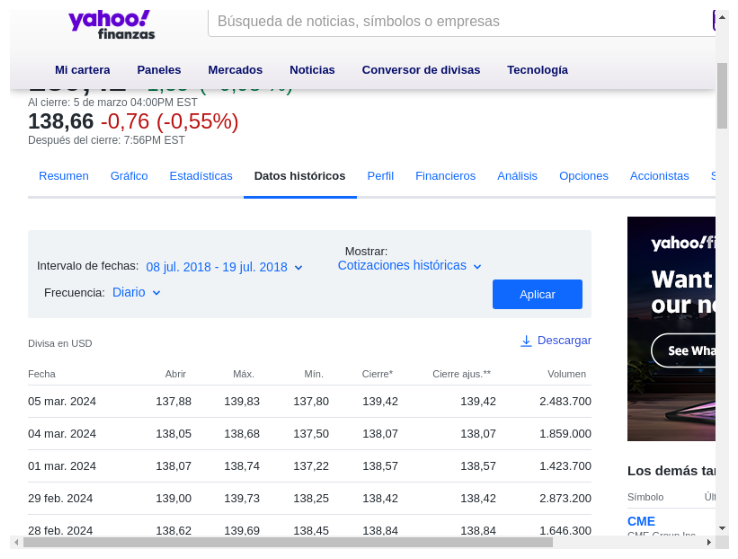

In [ ]:
driver.get_screenshot_as_file("screen.png")
img = mpimg.imread("screen.png")
fig, ax = plt.subplots(figsize=(10, 7))
ax.imshow(img)
ax.axis("off");



> Los datos se guardan en drive y se cargan directamente



In [ ]:
!wget 'https://drive.google.com/uc?export=view&id=1GFUMkojQtqVivkKTXVKwnFKNJxd4ZLnR' -O cost_accion.csv
df_acciones=pd.read_csv('/content/cost_accion.csv', on_bad_lines='skip')
df_acciones.head()

--2024-03-16 04:21:19--  https://drive.google.com/uc?export=view&id=1GFUMkojQtqVivkKTXVKwnFKNJxd4ZLnR
Resolving drive.google.com (drive.google.com)... 64.233.187.102, 64.233.187.139, 64.233.187.138, ...
Connecting to drive.google.com (drive.google.com)|64.233.187.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1GFUMkojQtqVivkKTXVKwnFKNJxd4ZLnR&export=view [following]
--2024-03-16 04:21:20--  https://drive.usercontent.google.com/download?id=1GFUMkojQtqVivkKTXVKwnFKNJxd4ZLnR&export=view
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 64.233.188.132, 2404:6800:4008:c06::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|64.233.188.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 181951 (178K) [application/octet-stream]
Saving to: ‘cost_accion.csv’

cost_accion.csv     100%[===================>] 177.69K  --.-KB/s    in 0.001

,Fecha,Abrir,Máx.,Mín.,Cierre,Cierre ajus.,Volumen,sym
0,19 jul. 2018,"76,66","76,97","75,69","75,76","70,47",1.595.600,GS
1,18 jul. 2018,"75,68","76,87","75,34","76,77","71,41",1.647.000,GS
2,17 jul. 2018,"74,98","75,79","74,82","75,61","70,33",1.452.200,GS
3,16 jul. 2018,"74,88","75,36","74,71","75,19","69,94",1.185.900,GS
4,13 jul. 2018,"74,81","74,81","73,80","74,70","69,48",1.242.600,GS


#### **Conjunto de datos unificado y filtrado para acciones pertenecientes al indice S&P 500**



> Se filtran los datos de nuestro corpus solo para las acciones pertenecientes al indice S&P 500



In [ ]:
df_tweets_filtrado =df_tweets[df_tweets.symbols.isin(list(df_constituents.loc[df_constituents['Fecha de incorporación'] < '2018-07-08',['Símbolo']]['Símbolo']))]
df_tweets_filtrado.head()

,id,text,timestamp,source,symbols,company_names,url,verified
0,1019696670777503700,VIDEO: “I was in my office. I was minding my o...,2018-07-18 21:33:26,GoldmanSachs,GS,The Goldman Sachs,https://twitter.com/i/web/status/1019696670777...,True
2,1019711413798035500,Who says the American Dream is dead? https://t...,2018-07-18 22:32:01,TheStreet,AIG,American,https://buff.ly/2L3kmc4,True
4,1019718460287389700,How satellites avoid attacks and space junk wh...,2018-07-18 23:00:01,Forbes,ORCL,Oracle,http://on.forbes.com/6013DqDDU,True
8,1019720723441635300,Senate wants emergency alerts to go out throug...,2018-07-18 23:09:00,TechCrunch,NFLX,Netflix,https://tcrn.ch/2L8DsgT,True
12,1019723856741830700,Bond traders are ahead of Jerome Powell when i...,2018-07-18 23:21:27,business,HPQ,HP,https://bloom.bg/2zSKhOu,True




> Se adicionan dos variables de interes que clasifican el mercado en Positivo Negativo y Neutro dependiedo del comportamiento del mercado en los dias especificos de nuestro corpus



Calculamos la variacion diaria en los dos casos:

$
\text{Variación Porcentual} = \frac{\text{Cierre} - \text{Apertura}}{\text{Apertura}} \times 100
$


y por medio de un boxplot determinamos en que momento se considera una variacion positiva negativa o neutra en el mercado:


In [ ]:
!wget 'https://drive.google.com/uc?export=view&id=1C0ufdLZUfx5njY9yJGQFFrwVXd3oe5fs' -O tweets_limpio.csv
df_tweets_limpio = pd.read_csv('/content/tweets_limpio.csv', on_bad_lines='skip')
df_tweets_limpio=df_tweets_limpio[~df_tweets_limpio.text.isnull()]
!wget 'https://drive.google.com/uc?export=view&id=1b1lwkC0OI5XTlFRR-fKxaqIo0dOtW2CY' -O Datos_historicos_SP500.csv
df_sp500 = pd.read_csv('/content/Datos_historicos_SP500.csv', on_bad_lines='skip')
df_sp500['Fecha'] = pd.to_datetime(df_sp500['Fecha'], format='%d.%m.%Y')
df_sp500['Último']=df_sp500['Último'].str.replace('.', '').str.replace(',', '.').astype(float)
df_sp500['Apertura']=df_sp500['Apertura'].str.replace('.', '').str.replace(',', '.').astype(float)
df_sp500['var']=(df_sp500['Último']-df_sp500['Apertura'])*100/df_sp500['Apertura']
df_sp500['SENT']=['Positivo' if var>=0.15 else 'Negativo' if var<=-0.15 else 'Neutro' for var in df_sp500['var'] ]
df_tweets_limpio['SENT_sp500']=[list(df_sp500[df_sp500.Fecha==tw[2]]['SENT'])[0] if datetime.strptime(tw[2], '%Y-%m-%d').weekday() not in (5,6) else list(df_sp500[df_sp500.Fecha==str(datetime.strptime(tw[2], '%Y-%m-%d')+timedelta(days=2))[:10]]['SENT'])[0] if datetime.strptime(tw[2], '%Y-%m-%d').weekday()==5 else list(df_sp500[df_sp500.Fecha==str(datetime.strptime(tw[2], '%Y-%m-%d')+timedelta(days=1))[:10]]['SENT'])[0]  for tw in df_tweets_limpio.values]
meses = {'ene.': '01','feb.': '02','mar.': '03','abr.': '04','may.': '05','jun.': '06','jul.': '07','ago.': '08','sep.': '09','oct.': '10','nov.': '11','dic.': '12'}
def convertir_fecha(fecha_str):
    dia, mes_abreviado, año = fecha_str.split()
    mes_numero = meses[mes_abreviado]
    return f'{año}-{mes_numero}-{dia.zfill(2)}'
df_acciones['Fecha'] = df_acciones['Fecha'].apply(convertir_fecha)
df_acciones=df_acciones.dropna()
df_acciones['Cierre']=df_acciones['Cierre'].str.replace('.', '').str.replace(',', '.').astype(float)
df_acciones['Abrir']=df_acciones['Abrir'].str.replace('.', '').str.replace(',', '.').astype(float)
df_acciones['var']=(df_acciones['Cierre']-df_acciones['Abrir'])*100/df_acciones['Abrir']
df_acciones['SENT']=['Positivo' if var>=0.15 else 'Negativo' if var<=-0.15 else 'Neutro' for var in df_acciones['var'] ]
df_tweets_limpio['SENT_AC']=[list(df_acciones[(df_acciones.Fecha==tw[2])&(df_acciones.sym==tw[4])]['SENT'])[0] if datetime.strptime(tw[2], '%Y-%m-%d').weekday() not in (5,6) and len(df_acciones[(df_acciones.Fecha==tw[2])&(df_acciones.sym==tw[4])]['SENT'])!=0 else list(df_acciones[(df_acciones.Fecha==str(datetime.strptime(tw[2], '%Y-%m-%d')+timedelta(days=2))[:10])&(df_acciones.sym==tw[4])]['SENT'])[0] if datetime.strptime(tw[2], '%Y-%m-%d').weekday()==5 and len(df_acciones[(df_acciones.Fecha==str(datetime.strptime(tw[2], '%Y-%m-%d')+timedelta(days=2))[:10])&(df_acciones.sym==tw[4])]['SENT'])!=0 else list(df_acciones[(df_acciones.Fecha==str(datetime.strptime(tw[2], '%Y-%m-%d')+timedelta(days=1))[:10])&(df_acciones.sym==tw[4])]['SENT'])[0] if len(df_acciones[(df_acciones.Fecha==str(datetime.strptime(tw[2], '%Y-%m-%d')+timedelta(days=1))[:10])&(df_acciones.sym==tw[4])]['SENT'])!=0 else None for tw in df_tweets_limpio.values]
df_tweets_limpio.dropna(subset=['SENT_AC'], inplace=True)

--2024-03-16 04:25:47--  https://drive.google.com/uc?export=view&id=1C0ufdLZUfx5njY9yJGQFFrwVXd3oe5fs
Resolving drive.google.com (drive.google.com)... 64.233.187.138, 64.233.187.102, 64.233.187.113, ...
Connecting to drive.google.com (drive.google.com)|64.233.187.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1C0ufdLZUfx5njY9yJGQFFrwVXd3oe5fs&export=view [following]
--2024-03-16 04:25:47--  https://drive.usercontent.google.com/download?id=1C0ufdLZUfx5njY9yJGQFFrwVXd3oe5fs&export=view
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 64.233.188.132, 2404:6800:4008:c06::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|64.233.188.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2840673 (2.7M) [application/octet-stream]
Saving to: ‘tweets_limpio.csv’

tweets_limpio.csv   100%[===================>]   2.71M  --.-KB/s    in 0.

In [ ]:
df_tweets_limpio.head()

,id,text,timestamp,source,symbols,company_names,url,verified,SENT_sp500,SENT_AC
0,1019696670777503700,VIDEO: “I was in my office. I was minding my o...,2018-07-18,GoldmanSachs,GS,The Goldman Sachs,https://twitter.com/i/web/status/1019696670777...,True,Positivo,Positivo
1,1019696670777503700,video office run business david solomon tell i...,2018-07-18,GoldmanSachs,GS,The Goldman Sachs,https://twitter.com/i/web/status/1019696670777...,True,Positivo,Positivo
2,1019711413798035500,say american dream dead,2018-07-18,TheStreet,AIG,American,https://buff.ly/2L3kmc4,True,Positivo,Positivo
3,1019718460287389700,satellite avoid attack space junk circle earth...,2018-07-18,Forbes,ORCL,Oracle,http://on.forbes.com/6013DqDDU,True,Positivo,Negativo
4,1019720723441635300,senate want emergency call netflix spotify etc,2018-07-18,TechCrunch,NFLX,Netflix,https://tcrn.ch/2L8DsgT,True,Positivo,Negativo


Se determina 'Positivo' si la variacion es mayor a 0.15, 'Negativo' si la variacion es menor a -0.15 y 'Neutro' si la variacion esta entre -0.15 y 0.15.

# Entendimiento y Preparación del Corpus
---

## **1. Análisis Exploratorio de los Textos**
---


### **1.1. Resumen General de los Textos**
---


**¿Cuántos documentos tiene el corpus?**

se toma la informacion de un  tweet como un documento, por lo que se cuenta 28264 documentos para analizar inicialmente.

In [ ]:
!wget 'https://drive.google.com/uc?export=view&id=1lMyO7ykmFnr065d4G18CXTSRpDX3iAgI' -O stockerbot-export.csv
df_tweets = pd.read_csv('/content/stockerbot-export.csv', on_bad_lines='skip')
len(df_tweets)


--2024-03-01 03:07:48--  https://drive.google.com/uc?export=view&id=1lMyO7ykmFnr065d4G18CXTSRpDX3iAgI
Resolving drive.google.com (drive.google.com)... 64.233.188.101, 64.233.188.100, 64.233.188.113, ...
Connecting to drive.google.com (drive.google.com)|64.233.188.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1lMyO7ykmFnr065d4G18CXTSRpDX3iAgI&export=view [following]
--2024-03-01 03:07:49--  https://drive.usercontent.google.com/download?id=1lMyO7ykmFnr065d4G18CXTSRpDX3iAgI&export=view
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 173.194.174.132, 2404:6800:4008:c1b::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|173.194.174.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7277599 (6.9M) [application/octet-stream]
Saving to: ‘stockerbot-export.csv’

stockerbot-export.c 100%[===================>]   6.94M  --.-KB/s   

28264

**¿En qué idioma se encuentran?**

la mayoria de los documentos tienen su informacion en ingles, sin embargo hay algunos que se encuantra en otros idomas como japones.

**¿Qué tamaño en MB tiene el corpus?**

7.28 MB

**¿Hay alguna relación entre distintos documentos del corpus?**

los distintos documentos se pueden relacionarse segun el autor que lo publicò, ademas hay tweets que son respuesta a otros que pueden estar dentro del corpus.

### **1.2. Resumen de la Calidad de los Textos**
---

¿**Hay datos faltantes o documentos vacíos?**

 usando la funcion isnull().sum() se  encuantra informacion faltante en los documentos, obteniendo como resultado lo siguiente:

In [ ]:
missing=df_tweets.isnull().sum()
missing

id                  0
text                0
timestamp           0
source              0
symbols             0
company_names       1
url              6369
verified            0
dtype: int64

La mayoria de datos faltantes corresponden a la columna de URL que presenta los enlaces de los tweets, por lo que eliminado estos documentos con datos faltantes se  obtienen 197848  documentos a utilizar.



**¿Existen documentos ilegibles o con problemas de codificación?**

hay documentos con textos los cuales contienen caracteres especiales que no presenta informacion relevante para el ejercicio. como se ve en este tweet

"RT @invest_in_hd: 'Nuff said! $TEL #telcoin #..."

**¿Hay mezcla de idiomas en el corpus?, ¿qué se puede hacer al respecto?**

hay documentos con informacion en otros idiomas, como se ve en el siguiente segmento de la tabla
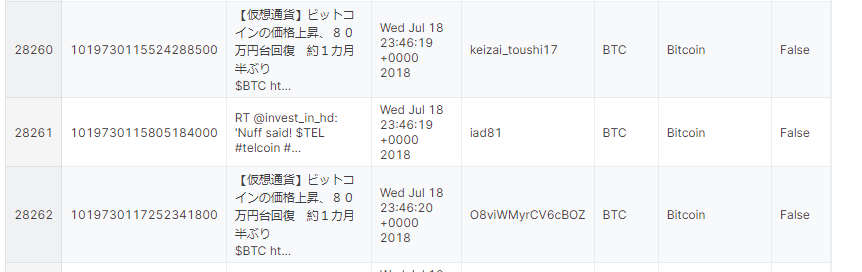

al ser un corpus tan grande es posible eliminar los documentos que no estan en ingles que representan menos del 5% total del corpus. se utilizara spacy con su modelo "en_core_web_sm" para filtrar los demas idiomas y normalizar el texto en los documentos.

### **1.3. Tipos de variables**
---

- ¿El corpus tiene una variable objetivo a estimar?, de ser así, ¿es una variable continúa o categórica?
- Analice la distribución de las etiquetas, identifique si hay desbalanceo de datos.
- Analice los documentos, y determine cuál es la distribución de la longitud de los documentos a nivel carácter o palabra.
- ¿El conjunto de datos cuenta con otras variables adicionales?, de ser así, debe analizar cuáles se incorporarán en el modelo y hacer un análisis descriptivo de las mismas.

**¿El corpus tiene una variable objetivo a estimar?, de ser así, ¿es una variable continúa o categórica?**

R: Se cuenta con dos variables de interes, estas variables son categoricas "Positivo" "Negativo" y "Neutro" dependiendo el comportamiento del mercado tanto para el indice S&P 500 como para las acciones que lo componen.

**Analice la distribución de las etiquetas, identifique si hay desbalanceo de datos.**

R:



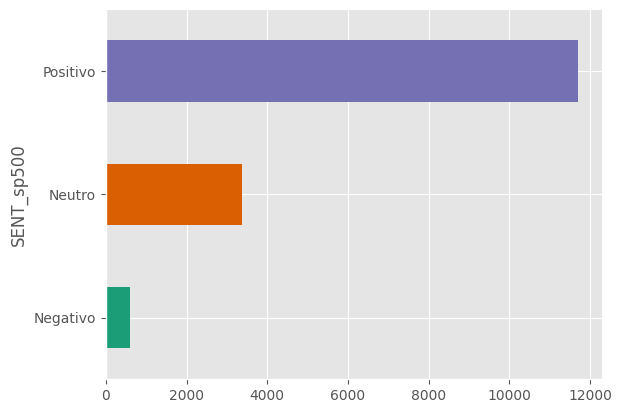

In [ ]:
# @title SENT_sp500

df_tweets_limpio.groupby('SENT_sp500').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

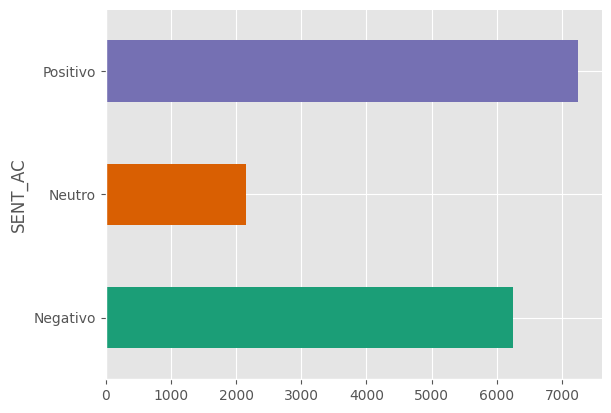

In [ ]:
# @title SENT_Aciones

df_tweets_limpio.groupby('SENT_AC').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

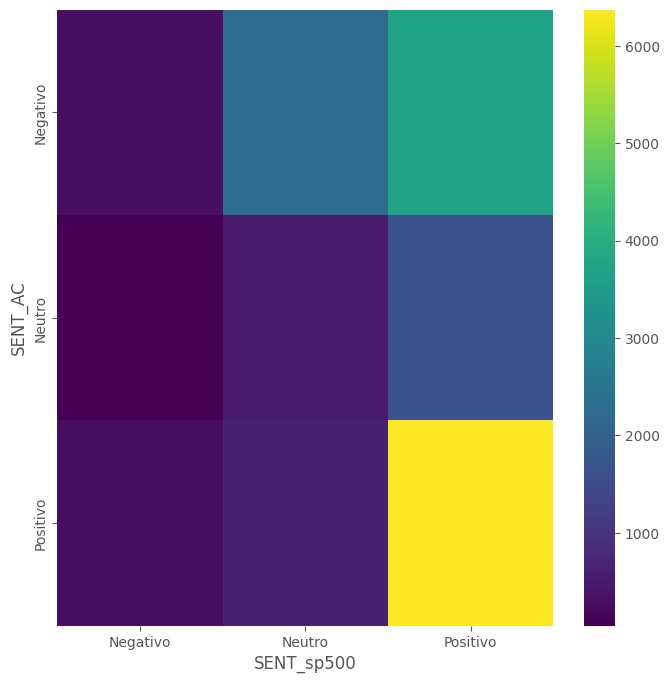

In [ ]:
# @title SENT_sp500 vs SENT_AC

plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['SENT_AC'].value_counts()
    for x_label, grp in df_tweets_limpio.groupby('SENT_sp500')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('SENT_sp500')
_ = plt.ylabel('SENT_AC')

Se presenta un desvalance en el caso de la variable del comportamiento del mercado en el indice S&P 500 a favor de la categoria "Positivo". Sin embargo, esto no sucede en la variable del comportamiento de las acciones pertenecientes a este indice, donde se ve un comportamiento mas homogeneo entre las categrias

**Analice los documentos, y determine cuál es la distribución de la longitud de los documentos a nivel carácter o palabra.**

la gran mayoria de documentos presenta alrededor de 100-150 caracteres, por lo que se utilizar este rango de documento no presenta mayor perdida de informacion.

In [ ]:
Len=df_tweets["text"].apply(len)
Len.value_counts()

140      3035
139      1802
138      1213
136       942
137       812
         ... 
159         1
17651       1
3948        1
1760        1
2           1
Name: text, Length: 160, dtype: int64

**¿El conjunto de datos cuenta con otras variables adicionales?, de ser así, debe analizar cuáles se incorporarán en el modelo y hacer un análisis descriptivo de las mismas.**

el conjunto de datos cuenta con variables de tiempo que muestra la fecha y hora del momento que se realizó el tweet. esta informacion no parece tan relevante para el analisis de sentimiento.

de las demas varaibles encontrada en el conjunto de datos, la varable nombrada company_names puede indicar cuantos tweets nomran cada compañia y cuales son las 10 mas nombradas en el conjunto de datos.

In [ ]:
company_count= df_tweets['company_names'].value_counts().head(10)  # top 10
company_count

Twenty-First Century Fox        131
Alphabet Inc.                   116
Discovery                       102
Netflix                         101
Honeywell International Inc.    100
Eversource Energy               100
Applied Materials               100
The Gap                         100
M&T Bank Corporation            100
Momo Inc.                       100
Name: company_names, dtype: int64

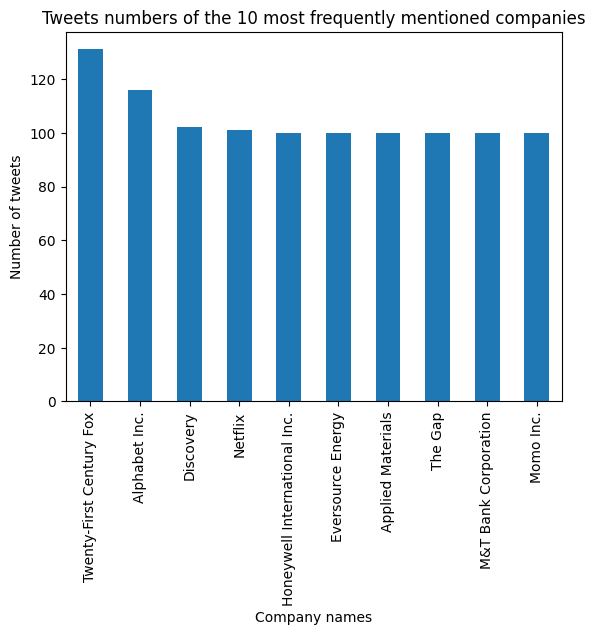

In [ ]:
import matplotlib.pyplot as plt
company_count.plot.bar();
plt.ylabel("Number of tweets");
plt.xlabel("Company names");
plt.title("Tweets numbers of the 10 most frequently mentioned companies");

### **1.4. Relación Entre Variables**
---

Es posible buscar una relacion entre la cantidad de tweets por dia y el indice  s&p 500 en ese dia. asi es posible saber si hay una relacion segun como cambia el indice segun la cantidad de tweets por dia.

         Fecha  Número de tweet's
0   2018-02-23                  1
1   2018-07-08                 20
2   2018-07-09                657
3   2018-07-10                920
4   2018-07-11               1010
5   2018-07-12               1562
6   2018-07-13               1456
7   2018-07-14               1071
8   2018-07-15               2084
9   2018-07-16               3085
10  2018-07-17               5076
11  2018-07-18              11314
12  2018-07-19                  8



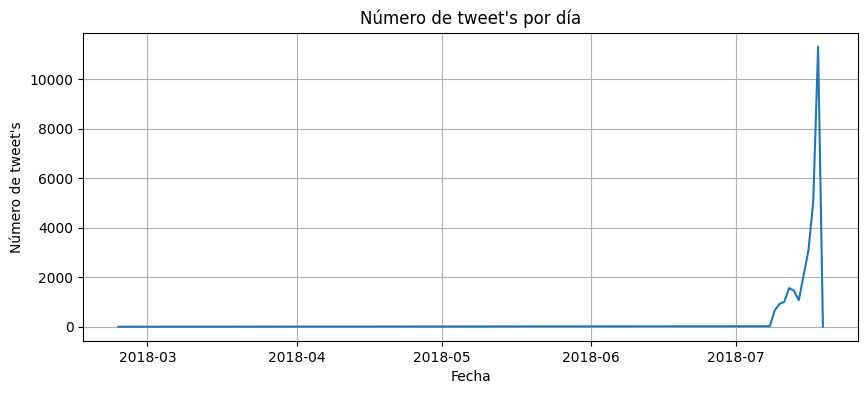

In [ ]:
df_tweets['timestamp'] = pd.to_datetime(df_tweets['timestamp'], format='%a %b %d %H:%M:%S +0000 %Y')

df_tweets['timestamp'] = df_tweets['timestamp'].dt.date
daily_count = df_tweets.groupby('timestamp').size()
df_daily_count = daily_count.reset_index()
df_daily_count.columns = ['Fecha', "Número de tweet's"]

print(df_daily_count)
print('')

plt.figure(figsize=(10, 4))
daily_count.plot()
plt.title("Número de tweet's por día")
plt.xlabel('Fecha')
plt.ylabel("Número de tweet's")
plt.grid(True)
plt.show()

**bold text**

## **2. Limpieza de los Textos**
---




---


La limpieza de los textos empieza escoguiendo el pipeline de spacy "en_core_web_sm" ya que este fue entrenado en blogs, comentarios, y paguinas web y guarda similitud con los tweets que se pretenden limpiar.

Adicionalmente se le incluye a este pipeline un verificador de palabras el cual pretende correguir algunos errores ortograficos dentro de los tweets para tratar de normalizar los textos.



---



In [ ]:
spacy.cli.download("en_core_web_sm")

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
nlp = spacy.load('en_core_web_sm',exclude=[
            "ner"
            ])
contextualSpellCheck.add_to_pipe(nlp, config={"max_edit_dist":10})

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/436M [00:00<?, ?B/s]



---



Visualizacion previa de datos:



---



In [ ]:
df_tweets_filtrado=df_tweets_filtrado.reset_index(drop=True)
for i in range(0,10):
  print(df_tweets_filtrado['text'][i])

VIDEO: “I was in my office. I was minding my own business...” –David Solomon tells $GS interns how he learned he wa… https://t.co/QClAITywXV
Who says the American Dream is dead? https://t.co/CRgx19x7sA
How satellites avoid attacks and space junk while circling the Earth https://t.co/aHzIV3Lqp5 #paid @Oracle https://t.co/kacpqZWiDJ
Senate wants emergency alerts to go out through Netflix Spotify etc. https://t.co/23yy3whBlc by @grg
Bond traders are ahead of Jerome Powell when it comes to inflation expectations https://t.co/DkdZLcy3mT via… https://t.co/UCX7EiHP4r
Alcoa cuts adjusted EBITDA forecast citing tariffs shares slide https://t.co/mdMJXjnYIs https://t.co/5O8fvwlHpY
Customers urge boycott of MGM Resorts after the casino files lawsuits against mass shooting victims… https://t.co/dAhk87dPmA
White House struggles to contain fallout from Trump-Putin summit https://t.co/NtzACHJibs https://t.co/fLshAUDRzs
Templeton and BlackRock say now's the time to buy emerging markets https://t.co/h4z



---



Dado que los datos tienen urls, lo primero que hara nuestra funcion de preprocesamiento sera eliminar estos links, posterioremnte normalizara el texto y pondra todo en minusculas. Luego se le aplicara el verificador  de palabras el cual pretende correguir algunos errores ortograficos.

Dado que ya hay una normalizacion se eliminan caracteres especiales dejando solo caracteres de la a a la z y incluyendo tres signos especiales "$", "#", "%". Estos tres signos en los tweets indican si se habla de la accion o si se trata de esprezar variaciones o cantidades netas de dinero por lo que es posible que aporten informacion dado el contexto financiero en el que estamos.

Se continuo eliminando espacios duplicados, eliminando stopwords en los twets que no aportan informacion y por ultima haciendo una lematizacion para normalizar verbos conjugados o en un tiempo en especifico.



---



In [ ]:
def preprocess(text, nlp):
    # Reemplazar URLs
    texto = re.sub(r"\S*https?:\S*", "", text, flags=re.MULTILINE)
    # Eliminar acentos y convertir a minúsculas
    norm_text = unidecode(texto).lower()
    # Procesar el texto con spaCy
    doc = nlp(norm_text.strip())
    tokens = doc._.outcome_spellCheck
    pat = re.compile(r"[^a-z$#%]")
    spaces = re.compile(r"\s{2,}")
    clean_text = re.sub(pat, " ", tokens)
    preprocess_text = re.sub(spaces, " ", clean_text)
    tokens = nlp(preprocess_text)
    lemmas = [token.lemma_ for token in tokens if not token.is_stop]
    preprocess_text = " ".join(lemmas)

    return preprocess_text




---


Al aplicar la funcion podemos ver un ejemplo del antes y el despues de aplicar el preprocesamiento



---



In [ ]:
print('Antes:')
display(df_tweets_filtrado.text.iloc[1])
text = preprocess(df_tweets_filtrado.text.iloc[1], nlp)
print('Despues:')
display(text)

Antes:


'Who says the American Dream is dead? https://t.co/CRgx19x7sA'

Despues:


'say dream dead'



---



Posteriormente se aplica el preprocesamiento a todo el corpus. Dado el alto numero de tweets y la complejidad del modelo de spacy que se aplicó, este codigo puede tomar varias horas, por lo que se limito el numero de tweets a 100 tweets para mostrar su funcionamiento sobre el corpus. Posteriormente se trabajará con un archico con los tweets ya preprocesados previamente.



---



In [ ]:
df_tweets_limpio = df_tweets_filtrado.copy().head(100)
df_tweets_limpio['text'] = df_tweets_limpio.text.apply(preprocess, nlp=nlp)
list(df_tweets_limpio.text.head())

['video office run business isly tell $ r learn wa',
 'say dream dead',
 'satellite avoid attack space junk circle earth # pay',
 'senate want emergency call theire etc',
 'bond trader ahead thex come inflation expectation']



---

Archivo tweets ya limpios:


---



In [ ]:
!wget 'https://drive.google.com/uc?export=view&id=1C0ufdLZUfx5njY9yJGQFFrwVXd3oe5fs' -O tweets_limpio.csv
df_tweets_limpio = pd.read_csv('/content/tweets_limpio.csv', on_bad_lines='skip')
df_tweets_limpio

--2024-03-01 01:38:44--  https://drive.google.com/uc?export=view&id=1C0ufdLZUfx5njY9yJGQFFrwVXd3oe5fs
Resolving drive.google.com (drive.google.com)... 173.194.210.100, 173.194.210.139, 173.194.210.138, ...
Connecting to drive.google.com (drive.google.com)|173.194.210.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1C0ufdLZUfx5njY9yJGQFFrwVXd3oe5fs&export=view [following]
--2024-03-01 01:38:44--  https://drive.usercontent.google.com/download?id=1C0ufdLZUfx5njY9yJGQFFrwVXd3oe5fs&export=view
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 172.217.193.132, 2607:f8b0:400c:c03::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|172.217.193.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2840673 (2.7M) [application/octet-stream]
Saving to: ‘tweets_limpio.csv’

tweets_limpio.csv   100%[===================>]   2.71M  --.-KB/s   

,id,text,timestamp,source,symbols,company_names,url,verified
0,1019696670777503700,VIDEO: “I was in my office. I was minding my o...,2018-07-18,GoldmanSachs,GS,The Goldman Sachs,https://twitter.com/i/web/status/1019696670777...,True
1,1019696670777503700,video office run business david solomon tell i...,2018-07-18,GoldmanSachs,GS,The Goldman Sachs,https://twitter.com/i/web/status/1019696670777...,True
2,1019711413798035500,say american dream dead,2018-07-18,TheStreet,AIG,American,https://buff.ly/2L3kmc4,True
3,1019718460287389700,satellite avoid attack space junk circle earth...,2018-07-18,Forbes,ORCL,Oracle,http://on.forbes.com/6013DqDDU,True
4,1019720723441635300,senate want emergency call netflix spotify etc,2018-07-18,TechCrunch,NFLX,Netflix,https://tcrn.ch/2L8DsgT,True
...,...,...,...,...,...,...,...,...
16355,1019730002361946100,moonhumster binance distribute fork mean free ...,2018-07-18,wyZINx8surZpoIJ,KMI,Kinder Morgan,https://www.binance.com/?ref=13937988,False
16356,1019730004890902500,endpt lilly pfizer celebrate huge success bloc...,2018-07-18,strong_bio,LLY,Eli Lilly and Company,NaN,False
16357,1019730005675401200,cisco report amazon deny plan compete switch c...,2018-07-18,WallStJesus,JNPR,Juniper Networks,https://seekingalpha.com/news/3371295?source=ansh,False
16358,1019730035576623100,perfect machine run dry wall street journal x ...,2018-07-18,danhyder,XOM,Exxon Mobil Corporation,https://twitter.com/i/web/status/1019730035576...,False




---

Hay algunos casos como el siguiente tweet que solo tenian una URl, por lo que al momento de hacer el filtrado quedaron con pocas o ninguna palabra

---



In [ ]:
df_tweets_filtrado[df_tweets_filtrado.id==1019725602104979500]['text']

16247    $CSCO https://t.co/gwDBAwZnjT
Name: text, dtype: object



---

Se eliminan estos casos y al final nos queda un corpus de 16231 tweets con su respectivo preprocesamiento

---



In [ ]:
df_tweets_limpio=df_tweets_limpio[~df_tweets_limpio.text.isnull()]
df_tweets_limpio

,id,text,timestamp,source,symbols,company_names,url,verified
0,1019696670777503700,VIDEO: “I was in my office. I was minding my o...,2018-07-18,GoldmanSachs,GS,The Goldman Sachs,https://twitter.com/i/web/status/1019696670777...,True
1,1019696670777503700,video office run business david solomon tell i...,2018-07-18,GoldmanSachs,GS,The Goldman Sachs,https://twitter.com/i/web/status/1019696670777...,True
2,1019711413798035500,say american dream dead,2018-07-18,TheStreet,AIG,American,https://buff.ly/2L3kmc4,True
3,1019718460287389700,satellite avoid attack space junk circle earth...,2018-07-18,Forbes,ORCL,Oracle,http://on.forbes.com/6013DqDDU,True
4,1019720723441635300,senate want emergency call netflix spotify etc,2018-07-18,TechCrunch,NFLX,Netflix,https://tcrn.ch/2L8DsgT,True
...,...,...,...,...,...,...,...,...
16355,1019730002361946100,moonhumster binance distribute fork mean free ...,2018-07-18,wyZINx8surZpoIJ,KMI,Kinder Morgan,https://www.binance.com/?ref=13937988,False
16356,1019730004890902500,endpt lilly pfizer celebrate huge success bloc...,2018-07-18,strong_bio,LLY,Eli Lilly and Company,NaN,False
16357,1019730005675401200,cisco report amazon deny plan compete switch c...,2018-07-18,WallStJesus,JNPR,Juniper Networks,https://seekingalpha.com/news/3371295?source=ansh,False
16358,1019730035576623100,perfect machine run dry wall street journal x ...,2018-07-18,danhyder,XOM,Exxon Mobil Corporation,https://twitter.com/i/web/status/1019730035576...,False


# Extracción de Características
---


In [ ]:
spacy.cli.download("en_core_web_sm")

## 1. Selección del embedding




**Se seleccionaron 2 tipos de embedding que pueden funcionar en nuestro courpus de tweets, estos se evaluaran con la exploracion del embedding y con la creacion del modelo con el fin de determinar cual es el mas adecuado para el contexto de nuestro proyecto:**


---

> **FastText**

*FastText considera subpalabras, lo que permite capturar mejor el significado de las palabras incluso cuando están mal escritas o son poco comunes. Esto es especialmente útil con los tweets. Ademas, al considerar subpalabras, FastText puede capturar relaciones semánticas y sintácticas más complejas entre las palabras. Esto puede ser útil para tareas como búsqueda semántica, agrupamiento de documentos y detección de sinónimos. gracias a estas caracteristicas, ademas de su bajo costo computacional, permite obtener un analisis inicial del corpus incluso con palabras complejas como se pueden ver en el area financiera.*





## 2. Implementacion del embedding

**Para la implementacion cargamos nuestro corpus limpio, filtrado y tokenizado**

In [ ]:
!wget 'https://drive.google.com/uc?export=view&id=1C0ufdLZUfx5njY9yJGQFFrwVXd3oe5fs' -O tweets_limpio.csv
df_tweets_limpio = pd.read_csv('/content/tweets_limpio.csv', on_bad_lines='skip')
df_tweets_limpio=df_tweets_limpio[~df_tweets_limpio.text.isnull()]
tokens = df_tweets_limpio['text'].apply(simple_preprocess)
tokens

--2024-03-13 01:02:12--  https://drive.google.com/uc?export=view&id=1C0ufdLZUfx5njY9yJGQFFrwVXd3oe5fs
Resolving drive.google.com (drive.google.com)... 172.253.122.113, 172.253.122.102, 172.253.122.139, ...
Connecting to drive.google.com (drive.google.com)|172.253.122.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1C0ufdLZUfx5njY9yJGQFFrwVXd3oe5fs&export=view [following]
--2024-03-13 01:02:12--  https://drive.usercontent.google.com/download?id=1C0ufdLZUfx5njY9yJGQFFrwVXd3oe5fs&export=view
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 172.253.63.132, 2607:f8b0:4004:c08::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|172.253.63.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2840673 (2.7M) [application/octet-stream]
Saving to: ‘tweets_limpio.csv’

tweets_limpio.csv   100%[===================>]   2.71M  --.-KB/s    i

0        [video, was, in, my, office, was, minding, my,...
1        [video, office, run, business, david, solomon,...
2                             [say, american, dream, dead]
3        [satellite, avoid, attack, space, junk, circle...
4        [senate, want, emergency, call, netflix, spoti...
                               ...                        
16355    [moonhumster, binance, distribute, fork, mean,...
16356    [endpt, lilly, pfizer, celebrate, huge, succes...
16357    [cisco, report, amazon, deny, plan, compete, s...
16358    [perfect, machine, run, dry, wall, street, jou...
16359    [stellar, price, binance, registration, open, ...
Name: text, Length: 16231, dtype: object



> **implementacion Embedding FastText**

In [ ]:
model = FastText(
    sentences=tokens,
    vector_size=100,
    epochs=20,
    workers=-1,
    min_n=2,
    max_n=4
)

In [ ]:
model.save("fasttext.model")

In [ ]:
embeddings = []
for token_list in tokens:
    token_embeddings = [model.wv[token] for token in token_list if token in model.wv]
    if token_embeddings:
        embeddings.append(sum(token_embeddings) )
    else:
        embeddings.append([0] * model.vector_size)


embeddings_array = np.array(embeddings)


(16231, 100)


> **implementacion Embedding Word2Vec**

In [ ]:
model = Word2Vec(sentences=tokens, vector_size=100, epochs=10, workers=-1)
embeddings = []

In [ ]:
for token_list in tokens:
    token_embeddings = [model.wv[token] for token in token_list if token in model.wv]
    if token_embeddings:
        embeddings.append(sum(token_embeddings))
    else:
        embeddings.append([0] * model.vector_size)

embeddings_array_1 = np.array(embeddings);
print(embeddings_array_1.shape)

(16231, 100)


## **3. Exploración del Embedding**
---

Como primer analisis se hará un wordcloud de nuestro corpus con el fin de evaluar el contexto de nuestro corpus y las palabras mas influyentes:

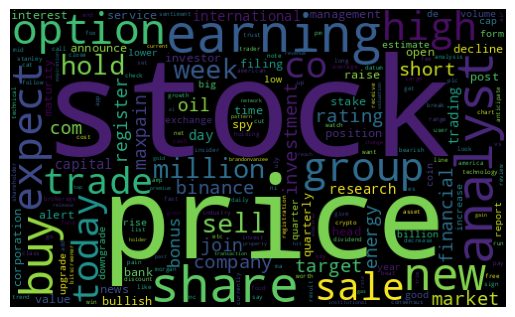

In [ ]:
corpus = list(df_tweets_limpio.text)
vect = (CountVectorizer(max_features=1000, max_df=0.7).fit(corpus))
X = vect.transform(corpus)
vocab = vect.get_feature_names_out()
counts = np.array(X.sum(axis=0)).flatten()
counts_dict = {word: count for word, count in zip(vocab, counts)}
wc = (WordCloud( width=500, height=300).generate_from_frequencies(counts_dict))
fig, ax = plt.subplots()
ax.imshow(wc)
ax.axis("off")
fig.show()

Posteriormente evaluamos estas categorias en cada uno de los embbedings para ver graficamente que tan relacionados estan los embbedings creados con el comportamiento del mercado, para esto se uso el algoritmo PCA para hacer una reduccion de las dimenciones y ver graficamente su comportamiento:

In [ ]:
def exp_embedding(array_1,sentimiento):
  indices_eliminar=sentimiento.reset_index().index.difference(sentimiento.reset_index().dropna().index)
  array=np.delete(array_1, indices_eliminar, axis=0)
  X = PCA(n_components=3).fit_transform(array)
  datos = X  # Array de forma (16231, 2)
  datos_3d = X  # Array de forma (16231, 3)
  categorias = sentimiento.dropna() # Categorías de ejemplo

  # Crear figura y subplots
  fig, axs = plt.subplots( figsize=(12, 6))
  positiva = datos[categorias == 'Positivo']
  negativa = datos[categorias == 'Negativo']
  neutra = datos[categorias == 'Neutro']

  # Scatter plot 2D
  ax1 = fig.add_subplot(121)
  ax1.scatter(positiva[:, 0], positiva[:, 1], color='blue', label='Positivo')
  ax1.scatter(negativa[:, 0], negativa[:, 1], color='red', label='Negativo')
  ax1.scatter(neutra[:, 0], neutra[:, 1], color='green', label='Neutro')
  ax1.set_xlabel('Eje X')
  ax1.set_ylabel('Eje Y')
  ax1.set_title('Embedding en 2D con Categorías')
  ax1.legend()

  # Scatter plot 3D
  ax2 = fig.add_subplot(122, projection='3d')
  colores = {'Positivo': 'b', 'Negativo': 'r', 'Neutro': 'g'}

  # Graficar puntos en 3D, distinguiendo por categoría
  for categoria in set(categorias):
      puntos_categoria = datos_3d[categorias == categoria]
      ax2.scatter(puntos_categoria[:, 0], puntos_categoria[:, 1], puntos_categoria[:, 2], c=colores[categoria], label=categoria)
  ax2.set_xlabel('Eje X')
  ax2.set_ylabel('Eje Y')
  ax2.set_zlabel('Eje Z')
  ax2.set_title('Embedding en 3D con Categorías')
  ax2.legend()

  plt.tight_layout()
  plt.show()



---


> **Exploración Embedding FastText en las acciones:**

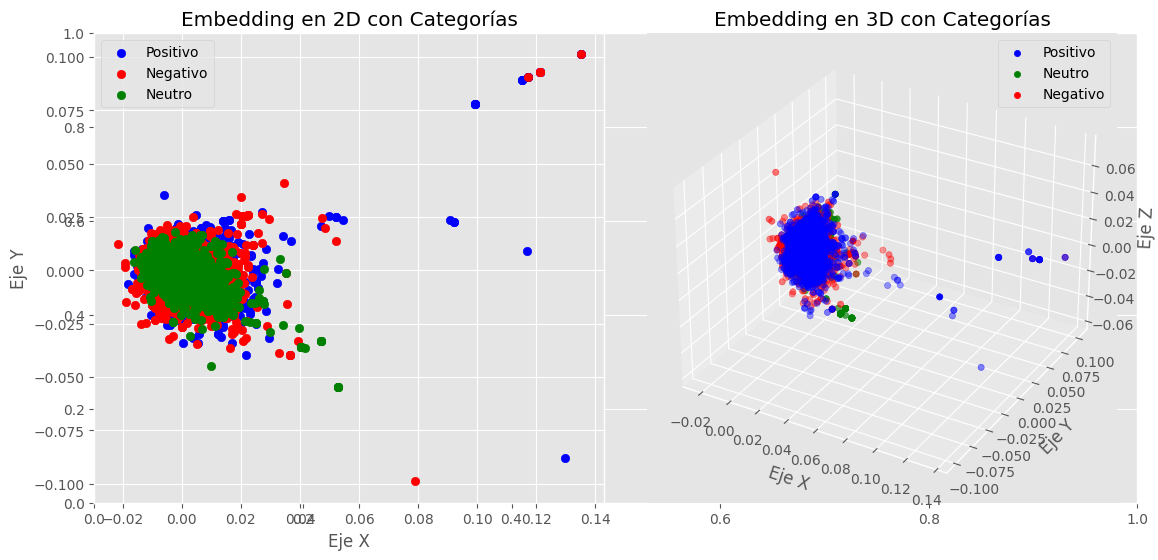

In [ ]:
exp_embedding(embeddings_array,df_tweets_limpio['SENT_AC'])

> **Exploración Embedding FastText en el indice S&P500:**

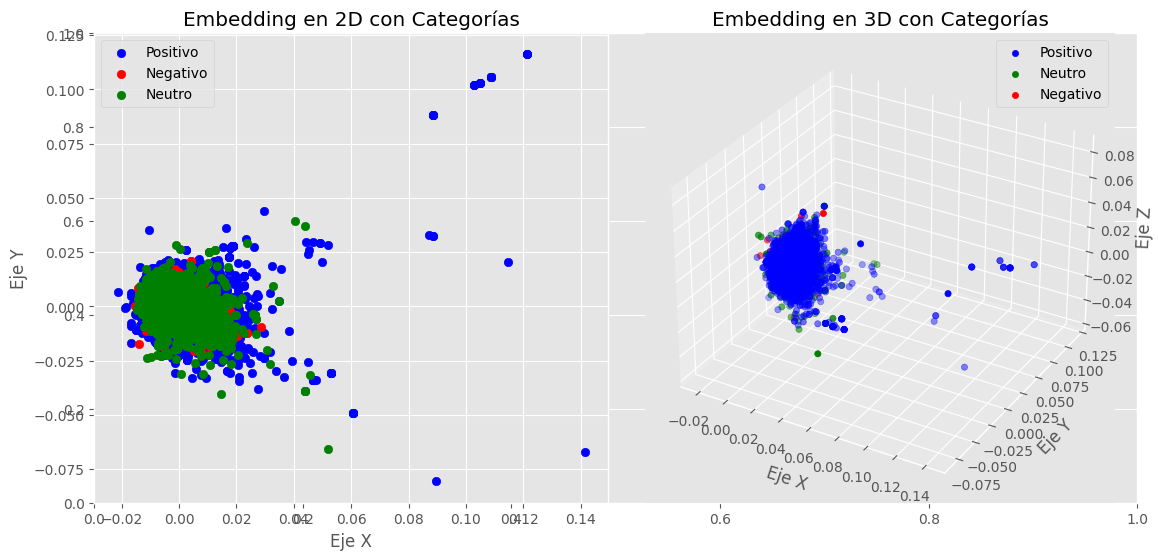

In [ ]:
exp_embedding(embeddings_array,df_tweets_limpio['SENT'])



---

> **Exploración Embedding Word2Vect en el indice S&P 500:**

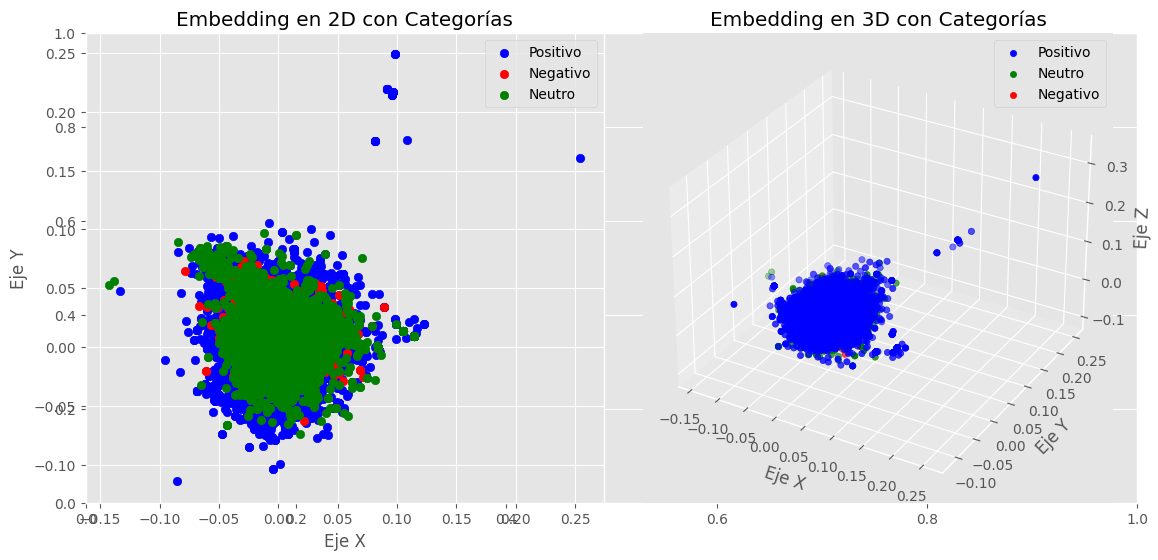

In [ ]:
exp_embedding(embeddings_array_1,df_tweets_limpio['SENT'])

> **Exploración Embedding 2 en las Acciones:**

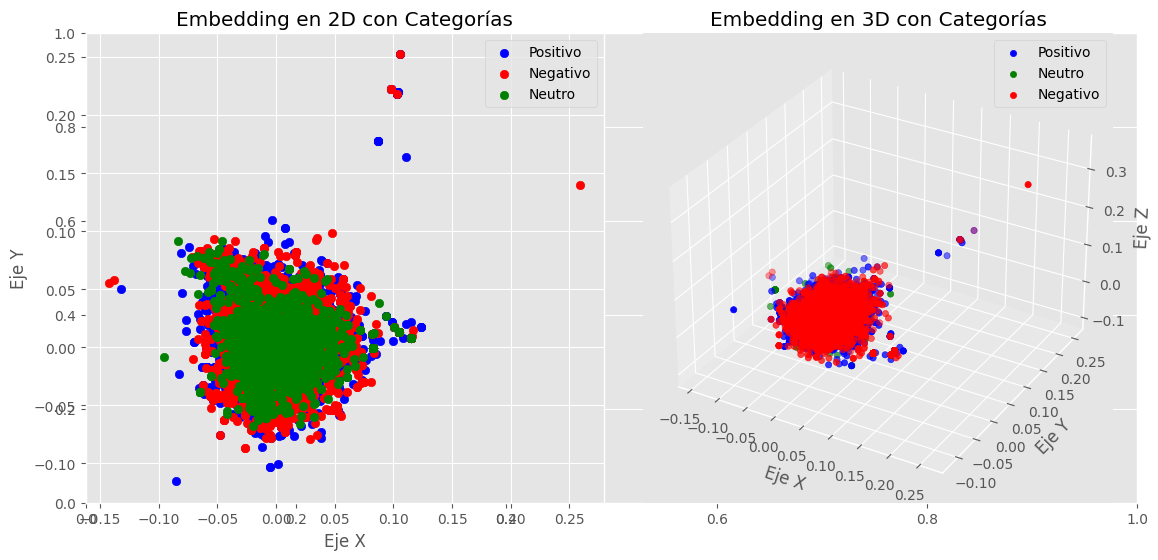

In [ ]:
exp_embedding(embeddings_array_1,df_tweets_limpio['SENT_AC'])

Los gráficos se comportan de manera similar para ambos embeddings, no se ve un relación directa entre estos embeddings y una representación gráfica. Sin embargo un modelo puede explicar mucho mejor los comportamientos que se ven el los gráficos y a partir de este se podra determinar cual de estos dos embeddings es más adecuado para determinar relaciones entre el comportamiento del mercado y los tweets que tenemos en nuestro corpus.



---



# Modelamiento y Evaluación
---

## **1. Tipo de Modelamiento**
---



El uso de un clasificador Random Forest es una elección sólida para nuestro proyecto, dado el contexto de grandes volúmenes de datos no lineales y potencialmente ruidosos que Twitter puede proporcionar, este modelo es una opción robusta y eficaz. El clasificador Random Forest es conocido por su capacidad para manejar eficientemente datos complejos, su resistencia al sobreajuste y su capacidad para capturar relaciones no lineales entre las características de los comentarios y los sentimientos asociados. Además, su naturaleza intuitiva y fácil de interpretar facilita la comunicación de los resultados tanto a audiencias técnicas como no técnicas. En resumen, el clasificador Random Forest ofrece una combinación de robustez, eficacia y facilidad de interpretación que lo hace una elección apropiada para nuestro proyecto de análisis de sentimientos en Twitter sobre el mercado financiero.

## **2. Implementación del modelo**
---



### **2.1. Importar Modelo**
---
La importación de las librerías RandomForestClassifier y pipeline es necesaria para acceder a funcionalidades específicas en nuestro proyecto. RandomForestClassifier nos permite implementar el modelo de clasificación Random Forest para analizar sentimientos en Twitter sobre el mercado financiero. Mientras que pipeline nos facilita el acceso a modelos pre-entrenados para tareas de procesamiento de lenguaje natural, como el análisis de sentimientos en textos, en este caso utilizando el modelo cardiffnlp/twitter-roberta-base-sentiment-latest.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from transformers import pipeline

model_hf = pipeline("text-classification", model="cardiffnlp/twitter-roberta-base-sentiment-latest")

config.json:   0%|          | 0.00/929 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

### **2.2. Entrenamiento del Modelo y Selección de Hiperparámetros**
---

## Preparamos los datos para la realizar la clasificacion
Preparamos los datos y utilizamos el modelo FastText para generar embeddings de texto. Luego dividimos los datos en conjuntos de entrenamiento y prueba para su posterior modelado y evaluación.

In [ ]:
# 1. Preparación de datos
X = df_tweets_limpio['text']  # Características
y_sp = df_tweets_limpio['SENT_sp500']
y_ac = df_tweets_limpio['SENT_AC']  # Etiquetas

# FastText Embedding
model = FastText(sentences=X, vector_size=100, epochs=20, workers=-1, min_n=2, max_n=4)
X_embeddings = [model.wv[word] for word in X]

text_train, text_test,X_train, X_test, y_train_sp, y_test_sp, y_train_ac, y_test_ac=train_test_split(list(df_tweets_limpio['text']), X_embeddings, y_sp,y_ac, test_size=0.2, random_state=42)


## Construimos el modelo y establecemos una grilla de hiperparametros para ambos casos

Construimos un modelo de clasificación utilizando Random Forest y utilizamos GridSearchCV para buscar la mejor combinación de hiperparámetros mediante validación cruzada. Finalmente, ajustamos el modelo a los datos de entrenamiento y seleccionamos el mejor estimador encontrado.


**Clasificador para el comportamiento en el mercado del indice S&P 500**


In [ ]:
# 2. Construir el modelo de clasificación
rf = RandomForestClassifier()
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1)

# 3. Entrenamiento y evaluación del modelo
grid_search.fit(X_train, y_train_sp)
best_rf_sp = grid_search.best_estimator_

**Clasificador para el comportamiento en el mercado de las acciones correspondientes**

In [ ]:
# 2. Construir el modelo de clasificación
rf = RandomForestClassifier()
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1)

# 3. Entrenamiento y evaluación del modelo
grid_search.fit(X_train, y_train_ac)
best_rf_ac = grid_search.best_estimator_

## **3. Evaluación o Aplicación del modelo**
---


**Evaluacion clasificador del comportamiento en el mercado del indice S&P 500**

In [ ]:

y_pred_sp = best_rf_sp.predict(X_test)
print(classification_report(y_test_sp, y_pred_sp))


              precision    recall  f1-score   support

    Negativo       0.67      0.09      0.16       113
      Neutro       0.74      0.23      0.35       709
    Positivo       0.78      0.97      0.86      2311

    accuracy                           0.77      3133
   macro avg       0.73      0.43      0.46      3133
weighted avg       0.76      0.77      0.72      3133



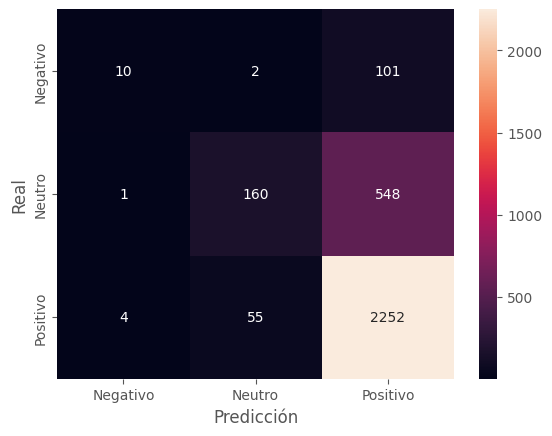

In [ ]:

labels = ["Negativo", "Neutro", "Positivo"]
cm = confusion_matrix(y_test_sp, y_pred_sp)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt=".0f", ax=ax, xticklabels=labels, yticklabels=labels)
ax.set_xlabel("Predicción")
ax.set_ylabel("Real")
fig.show()

**Interpretacion:**





Se evidencia una tendencia clara del modelo por predecir como positivos los tweets dado el comportamiento del mercado y esto se puede explicar dado que nuestro corpus tiene datos extraidos de un momento en que el comportamiento del indice s&P 500 en general fue positivo. Solo se evidencia un comportamiento adecuado a la hora de predecir los comportamientos positivos en el mercado (recall 0.97 para positivos). Para los demas casos parece no ser un buen clasificador







---


**Evaluacion clasificador del comportamiento en el mercado de las acciones correspondientes**

In [ ]:
y_pred_ac = best_rf_ac.predict(X_test)
print(classification_report(y_test_ac, y_pred_ac))

              precision    recall  f1-score   support

    Negativo       0.64      0.54      0.59      1257
      Neutro       0.87      0.22      0.35       440
    Positivo       0.59      0.81      0.68      1436

    accuracy                           0.62      3133
   macro avg       0.70      0.52      0.54      3133
weighted avg       0.65      0.62      0.60      3133



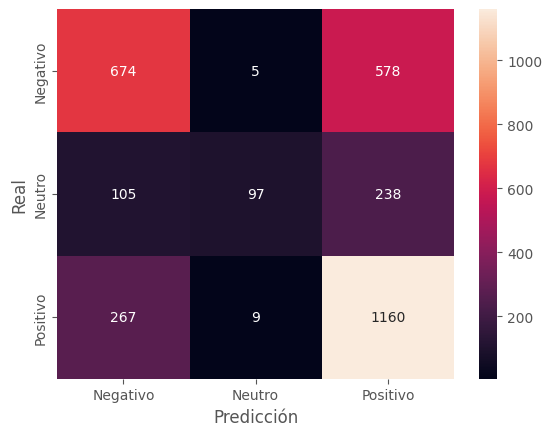

In [ ]:
labels = ["Negativo", "Neutro", "Positivo"]
cm = confusion_matrix(y_test_ac, y_pred_ac)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt=".0f", ax=ax, xticklabels=labels, yticklabels=labels)
ax.set_xlabel("Predicción")
ax.set_ylabel("Real")
fig.show()

**Interpretacion:**





Para el caso de las acciones si se ve comportamientos mas homogeneos en todas las categorias ya que se tienen en cuenta varias acciones que componen el indice S&P 500. Este caso al igual que el anterior muestra un buen desempeño a la hora de predecir los casos positivos (recall 0.81 para positivos). Sin embargo cabe resaltar que en el caso de clasificar los twwets como negativos, tuvo un comportamiento mucho mejor a lo que veiamos en el caso anterior, cerca al 60% indicandonos que puede ayudar al inversionista a tomar deciciones de no comprar con estos sentimientos de los tweets




---


**Comparacion con modelo clasificador de hugging face**

In [ ]:
predictions_hf=[]
for i in range(len(text_test)):
  a=model_hf(text_test[i])
  if a[0]['label']=='negative':
    predictions_hf.append('Negativo')
  elif a[0]['label']=='neutral':
    predictions_hf.append('Neutro')
  else:
    predictions_hf.append('Positivo')
predictions_hf=np.array(predictions_hf)


**S&P 500**

              precision    recall  f1-score   support

    Negativo       0.03      0.04      0.03       113
      Neutro       0.24      0.91      0.38       709
    Positivo       0.86      0.09      0.17      2311

    accuracy                           0.28      3133
   macro avg       0.38      0.35      0.19      3133
weighted avg       0.69      0.28      0.21      3133



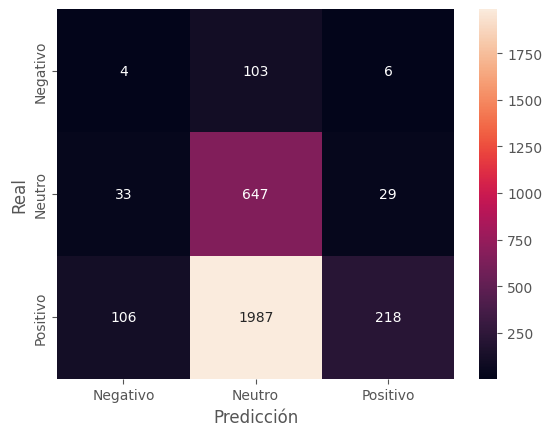

In [ ]:
print(classification_report(y_test_sp,  predictions_hf))
labels = ["Negativo", "Neutro", "Positivo"]
cm = confusion_matrix(y_test_sp, predictions_hf)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt=".0f", ax=ax, xticklabels=labels, yticklabels=labels)
ax.set_xlabel("Predicción")
ax.set_ylabel("Real")
fig.show()

**Interpretacion:**





Se evidencia en general un modelo que interpreto la mayoria de los tweets como neutros y de esta manera logró encontrar un recall del 91% para esta categoria, sin embargo tuvo una precision de un 24% lo que indica que clasifico una gran cantidad como neutro y muchos de estos casos realmente eran positivos. por lo que lo hace no ser un buen modelo comparado con el random forest y en temas de inversiones los comportamientos neutrales son los que no generan muchas ganancias





**Acciones**

              precision    recall  f1-score   support

    Negativo       0.48      0.05      0.10      1257
      Neutro       0.14      0.90      0.25       440
    Positivo       0.51      0.09      0.15      1436

    accuracy                           0.19      3133
   macro avg       0.38      0.35      0.17      3133
weighted avg       0.45      0.19      0.14      3133



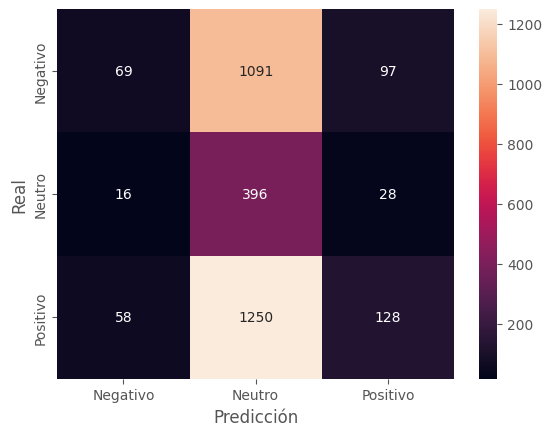

In [ ]:
print(classification_report(y_test_ac,  predictions_hf))
labels = ["Negativo", "Neutro", "Positivo"]
cm = confusion_matrix(y_test_ac, predictions_hf)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt=".0f", ax=ax, xticklabels=labels, yticklabels=labels)
ax.set_xlabel("Predicción")
ax.set_ylabel("Real")
fig.show()

**Interpretacion:**





Se evidencia en general un modelo que interpreto la mayoria de los tweets como neutros y de esta manera logró encontrar un recall del 90% para esta categoria, sin embargo tuvo una precision de un 14% lo que indica que clasifico una gran cantidad como neutro y muchos de estos casos realmente eran positivos. por lo que lo hace no ser un buen modelo comparado con el random forest y en temas de inversiones los comportamientos neutrales son los que no generan muchas ganancias



---



## **Créditos**

* **Profesor:** [Felipe Restrepo Calle](https://dis.unal.edu.co/~ferestrepoca/)
* **Asistentes docentes:**
    - [Juan Sebastián Lara Ramírez](https://www.linkedin.com/in/juan-sebastian-lara-ramirez-43570a214/).
* **Diseño de imágenes:**
    - [Rosa Alejandra Superlano Esquibel](mailto:rsuperlano@unal.edu.co).
* **Coordinador de virtualización:**
    - [Edder Hernández Forero](https://www.linkedin.com/in/edder-hernandez-forero-28aa8b207/).

**Universidad Nacional de Colombia** - *Facultad de Ingeniería*